# **IMBD Reviews Sentiment Analysis :**





In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Download NLTK stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1. Data Preparation:

* ✅ Load the IMDB dataset.
* ✅ Explore the dataset: print shape, head, and tail for a basic overview.
* ✅ Replace "positive" and "negative" sentiment labels with 1 and 0, respectively.
* ✅  Visualize the sentiment distribution using a histogram.




In [ ]:
# Load dataset
data = pd.read_csv('/content/IMDB Dataset.csv')

# Display the first few rows of the dataset to get an overview of its structure
data.head()



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Replace the 'sentiment' column values to binary labels: 'positive' -> 1 and 'negative' -> 0.
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

# Display basic statistics about the dataset to understand its distribution
data.describe()


,sentiment
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


Text(0, 0.5, 'Frequency')

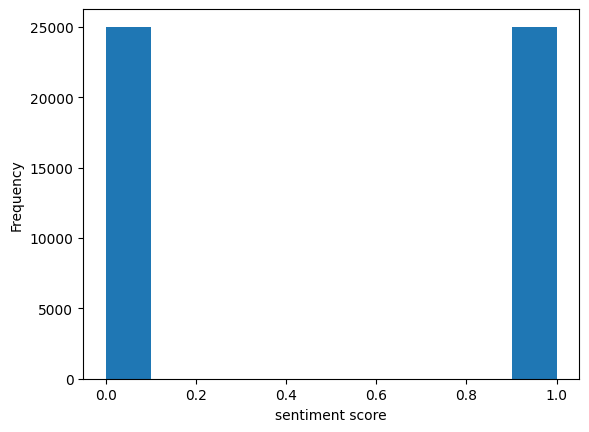

In [ ]:
sentiment = data["sentiment"]

plt.hist(sentiment)
plt.xlabel("sentiment score")
plt.ylabel("Frequency")


2. Text Preprocessing:


* ✅ Remove punctuation and non-alphabetical characters.
* ✅ Convert text to lowercase.
* ✅ Remove English stopwords using nltk.
* ✅ Apply stemming to reduce words to their root forms using PorterStemmer.




In [ ]:
def preprocess_text(review):
    review = re.sub('[^a-zA-Z]', ' ', review)  # Keep only letters
    review = review.lower().split()  # Convert to lowercase and split into words
    stop_words = set(stopwords.words('english'))  # Set of English stopwords
    ps = PorterStemmer()  # Initialize the PorterStemmer
    review = [ps.stem(word) for word in review if word not in stop_words]  # Remove stopwords and stem words
    return ' '.join(review)  # Join the words back into a single string


In [ ]:
# Apply the text preprocessing function to all the reviews in the dataset
data['review'] = data['review'].apply(preprocess_text)

# Display the first few rows of the preprocessed dataset
data.head()

,review,sentiment
0,one review mention watch oz episod hook right ...,1
1,wonder littl product br br film techniqu unass...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [ ]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Check the shape of the training and testing datasets
print(f"Training Data Shape: {train_data.shape}")
print(f"Testing Data Shape: {test_data.shape}")


Training Data Shape: (40000, 2)
Testing Data Shape: (10000, 2)


3. Modeling:

* ✅ Tokenize the reviews using Keras Tokenizer.
* ✅ Pad sequences to ensure uniform input size (200 tokens).
* ✅ Create a Sequential model:
* ✅ Embedding layer for word embeddings.
* ✅ LSTM layer for sequence processing.
* ✅ Dense layer with a sigmoid activation for binary classification.
* ✅ Compile the model with adam optimizer and binary_crossentropy loss.


In [ ]:
# Tokenize the reviews
# Convert the reviews into sequences of integers, where each integer represents a word.
# Limit the vocabulary to the top 5000 most frequent words.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])

# Convert training and testing reviews into padded sequences
# Each sequence will have a maximum length of 200 words (truncated or padded as needed)
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']), maxlen=200)

# Display the shape of the tokenized and padded data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(X_train[0])


X_train shape: (40000, 200)
X_test shape: (10000, 200)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  728  375   45  269  828  709 2264  256 3947  100
 1487   28  390   29    4 1734    9   54  931 1659 1007  244  107  834
  345   68 1183 1657 1845  141   21   58  353  158  365    1    1  124
 2190   16    4  940   23   61    3  124  241 4019 1322   52  119 1433
 2676  343  297  270   37   31  299 2682 2490  307  887  176   83  366
  378   73  157  620  302  159   50  546  140  186  309    6 1292  153
    1    1   80  975   94  981  648  286    5 2419 3128 1415  126   78
  118  934  654 3965  854    2  584  173  406  362  171   12   45   45
   78 2797  293   62 2028   93  615  276 1491 1997  206  555  282 1522
 1103 1735   68  300  925  581  308 1094  178 2228  331  560    1    1
   22 2183  911 1163   12  140    4  115  561  910  619 2670  123  306
    4 1633  116 3582  782 2404  710   66   57  101   40  399  141  228
 1229 1434  866  390  

In [ ]:
# Prepare the target variable (sentiment labels)
Y_train = train_data['sentiment'].values
Y_test = test_data['sentiment'].values

# Display the shape of the target variable
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

Y_train shape: (40000,)
Y_test shape: (10000,)


In [ ]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
# The model is compiled with the Adam optimizer and binary cross-entropy loss function, which is typical for binary classification.
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 134s 252ms/step - accuracy: 0.7468 - loss: 0.4991 - val_accuracy: 0.8596 - val_loss: 0.3361
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 138s 255ms/step - accuracy: 0.8839 - loss: 0.2937 - val_accuracy: 0.8683 - val_loss: 0.3186
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 251ms/step - accuracy: 0.9043 - loss: 0.2503 - val_accuracy: 0.8656 - val_loss: 0.3185
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 127s 255ms/step - accuracy: 0.9116 - loss: 0.2330 - val_accuracy: 0.8634 - val_loss: 0.3363
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 252ms/step - accuracy: 0.9228 - loss: 0.2057 - val_accuracy: 0.8577 - val_loss: 0.3479
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 146s 260ms/step - accuracy: 0.9333 - loss: 0.1778 - val_accuracy: 0.8654 - val_loss: 0.3679
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 259ms/step - accuracy: 0.9393 - loss: 0.1609 - val_accuracy: 0.8587 - val_loss: 0.4086
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 139s 254ms/step - accuracy: 0.9479 -

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (64, 200, 128)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (64, 128)                   │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (64, 1)                     │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,315,141 (8.83 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,543,428 (5.89 MB)

In [ ]:
# Evaluate the model on the testing data
# After training, we evaluate the model on the unseen test data to check the accuracy and loss.
loss, accuracy = model.evaluate(X_test, Y_test)

# Print the test loss and accuracy
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - accuracy: 0.8709 - loss: 0.4365
Test Loss: 0.44155946373939514
Test Accuracy: 0.8676999807357788


In [ ]:
# Define a function to predict sentiment of new reviews
# The function takes a new review as input, preprocesses it, and predicts whether it's positive or negative.

def predict_sentiment(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded_sequence)
    return "positive" if prediction[0][0] > 0.5 else "negative"

# Test the function with a new review
new_review = "This movie was bad  "
print(f"Sentiment: {predict_sentiment(new_review)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Sentiment: negative
